In [1]:
!pip install -q --upgrade xlrd openpyxl


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

df = pd.read_excel(r'C:\Users\Acer\github\Credit_Card_CD\Data\default of credit card clients.xls', 
                   header=1)

print("Dados para dataset original do Cartão de crédito:")
display(df.head(10))

Dados para dataset original do Cartão de crédito:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
print(df.columns.tolist())

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [4]:
aux_df = df.copy()

df_reduzido = (df
               .assign(
                   BILL_MEAN = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1),
                   PAY_MEAN  = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
               )
               .drop(columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                              'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default payment next month'])
              )

df_reduzido['DEFAULT_PAYMENT_NEXT_MONTH'] = aux_df['default payment next month']

print("Dataset como as medias dos pagamentos e faturas:")
display(df_reduzido.head(10))          

Dataset como as medias dos pagamentos e faturas:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_MEAN,PAY_MEAN,DEFAULT_PAYMENT_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,1284.000000,114.833333,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2846.166667,833.333333,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,16942.166667,1836.333333,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,38555.666667,1398.000000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,18223.166667,9841.500000,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,39685.666667,1295.333333,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,454099.166667,30126.500000,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,2247.666667,798.500000,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,10868.666667,1126.833333,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,4486.500000,2354.833333,0


In [5]:
print(df_reduzido.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_MEAN                     0
PAY_MEAN                      0
DEFAULT_PAYMENT_NEXT_MONTH    0
dtype: int64


In [6]:
print(df_reduzido.duplicated().sum())

0


In [7]:
print(df_reduzido['EDUCATION'].value_counts(), '\n')
print(df_reduzido['MARRIAGE'].value_counts(), '\n')
print(df_reduzido['SEX'].value_counts(), '\n')
print(df_reduzido['AGE'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64 

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64 

SEX
2    18112
1    11888
Name: count, dtype: int64 

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64


In [8]:
df_reduzido['EDUCATION'] = df_reduzido['EDUCATION'].replace([0,5,6], 4)
df_reduzido['MARRIAGE'] = df_reduzido['MARRIAGE'].replace([0], 3)

print(df_reduzido['EDUCATION'].value_counts(), '\n')
print(df_reduzido['MARRIAGE'].value_counts())

display(df_reduzido.head(10))

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64 

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_MEAN,PAY_MEAN,DEFAULT_PAYMENT_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,1284.000000,114.833333,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2846.166667,833.333333,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,16942.166667,1836.333333,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,38555.666667,1398.000000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,18223.166667,9841.500000,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,39685.666667,1295.333333,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,454099.166667,30126.500000,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,2247.666667,798.500000,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,10868.666667,1126.833333,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,4486.500000,2354.833333,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df_reduzido.copy()

df_normalized[['BILL_MEAN','PAY_MEAN']] = scaler.fit_transform(df_normalized[['BILL_MEAN','PAY_MEAN']])

display(df_normalized.head(10))

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_MEAN,PAY_MEAN,DEFAULT_PAYMENT_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,0.061420,0.000183,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,0.063094,0.001328,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,0.078197,0.002927,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,0.101353,0.002228,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,0.079569,0.015688,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,0.102564,0.002065,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,0.546567,0.048022,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,0.062453,0.001273,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,0.071689,0.001796,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0.064852,0.003754,0


In [10]:
bins = [18, 29, 49, 59, 69, 130]
labels = [1, 2, 3, 4, 5]

# Criar AGE_GROUP no df_normalized
df_normalized['AGE_GROUP'] = pd.cut(df_normalized['AGE'], bins=bins, labels=labels, right=True)
df_normalized['AGE_GROUP'] = df_normalized['AGE_GROUP'].astype(int)

# Conferir
print(df_normalized['AGE_GROUP'].value_counts())
display(df_normalized)

AGE_GROUP
2    17702
1     9618
3     2341
4      314
5       25
Name: count, dtype: int64


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_MEAN,PAY_MEAN,DEFAULT_PAYMENT_NEXT_MONTH,AGE_GROUP
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,0.061420,0.000183,1,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,0.063094,0.001328,1,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,0.078197,0.002927,0,2
3,4,50000,2,2,1,37,0,0,0,0,0,0,0.101353,0.002228,0,2
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,0.079569,0.015688,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,0.189568,0.011304,0,2
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,0.063827,0.003850,0,2
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,0.072633,0.008315,1,2
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,0.107653,0.039102,1,2


In [11]:
bins = [18, 28, 48, 58, 68, 130]  
labels = [1, 2, 3, 4, 5]   

df_normalized['AGE_GROUP'] = pd.cut(df_normalized['AGE'], bins=bins, labels=labels, right=True)
df_normalized['AGE_GROUP'] = df_normalized['AGE_GROUP'].astype(int)

display(df_normalized[['AGE','AGE_GROUP']].head(10))

,AGE,AGE_GROUP
0,24,1
1,26,1
2,34,2
3,37,2
4,57,3
5,37,2
6,29,2
7,23,1
8,28,1
9,35,2


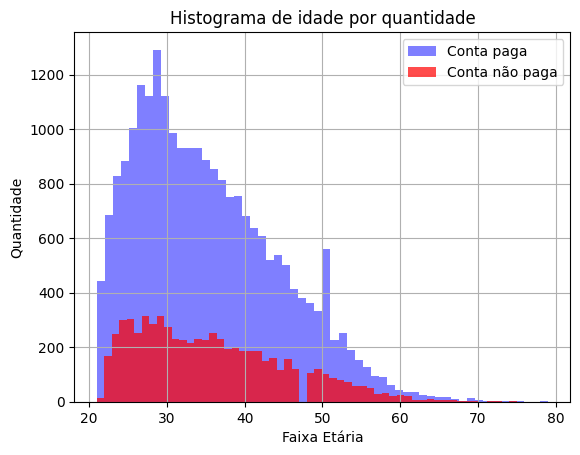

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Segmenta os dados para DEFAULT = 0
df_normalized[df_normalized['DEFAULT_PAYMENT_NEXT_MONTH'] == 0]['AGE'].hist(
    alpha=0.5, color='blue', bins=len(df_normalized['AGE'].unique())
)

# Segmenta os dados para DEFAULT = 1
df_normalized[df_normalized['DEFAULT_PAYMENT_NEXT_MONTH'] == 1]['AGE'].hist(
    alpha=0.7, color='red', bins=len(df_normalized['AGE'].unique())
)

# Adiciona legenda e títulos
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.title('Histograma de idade por quantidade')
plt.legend(['Conta paga', 'Conta não paga'])
plt.show()

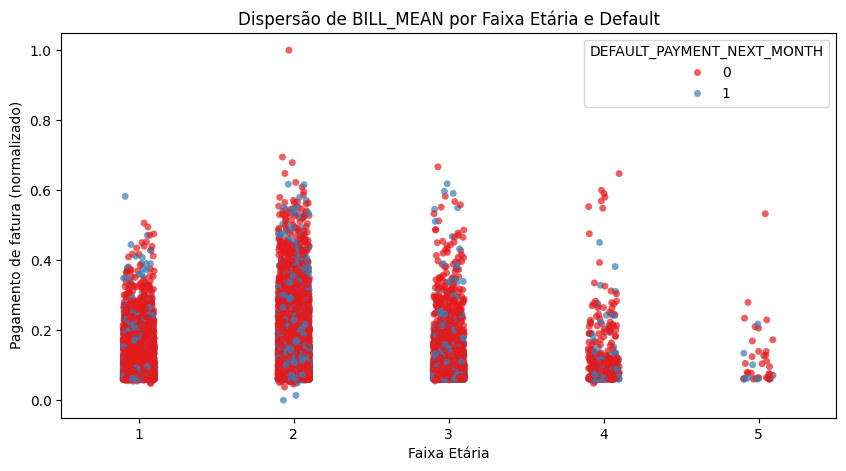

In [13]:
plt.figure(figsize=(10,5))
sns.stripplot(data=df_normalized, x='AGE_GROUP', y='BILL_MEAN', hue='DEFAULT_PAYMENT_NEXT_MONTH', jitter=True, palette='Set1', alpha=0.7)
plt.title('Dispersão de BILL_MEAN por Faixa Etária e Default')
plt.xlabel('Faixa Etária')
plt.ylabel('Pagamento de fatura (normalizado)')
plt.show()

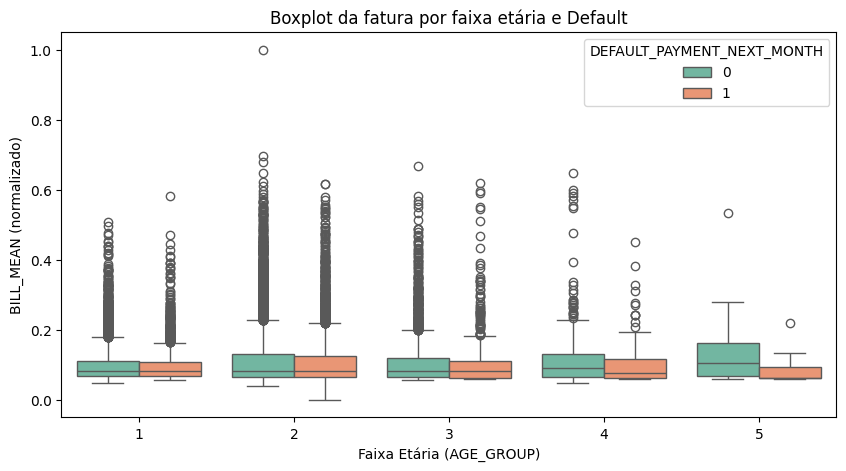

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_normalized, x='AGE_GROUP', y='BILL_MEAN', hue='DEFAULT_PAYMENT_NEXT_MONTH', palette='Set2')
plt.title('Boxplot da fatura por faixa etária e Default')
plt.xlabel('Faixa Etária (AGE_GROUP)')
plt.ylabel('BILL_MEAN (normalizado)')
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = df_normalized[['BILL_MEAN', 'AGE_GROUP']]

y = df_normalized['DEFAULT_PAYMENT_NEXT_MONTH']

# Modelo da Árvore de Decisão
dtc = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=3, 
    random_state=42
)

# Treinar
dtc.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

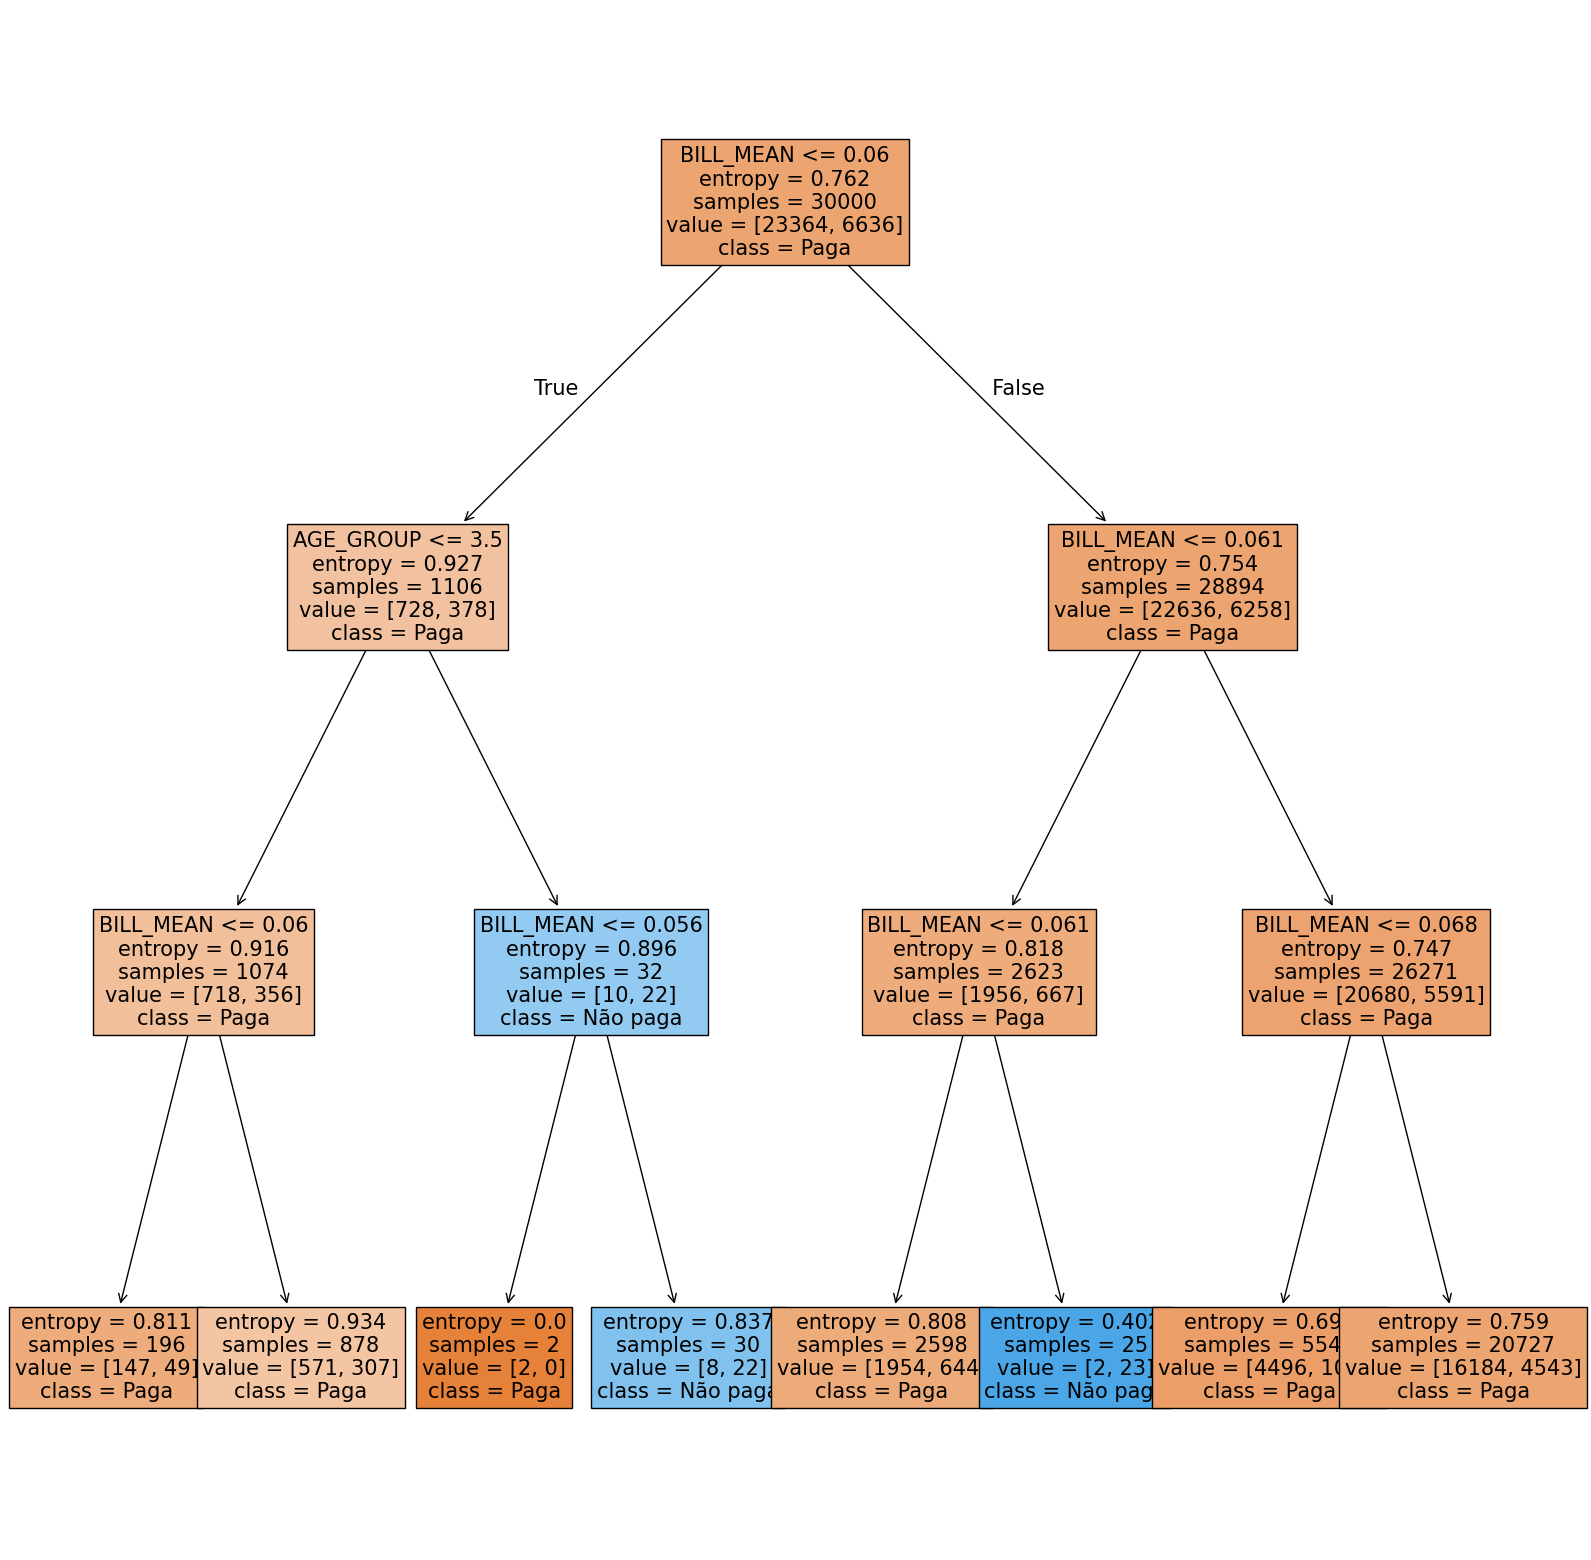

In [16]:
# Plotar árvore
plt.figure(figsize=(20,20))
plot_tree(
    dtc,
    filled=True,
    feature_names=X.columns,
    class_names=['Paga', 'Não paga'],
    max_depth=3,
    fontsize=15
)
plt.show()

## Clusterização

In [ ]:
from sklearn.cluster import KMeans

df_X = df_normalized.drop(columns='DEFAULT_PAYMENT_NEXT_MONTH')

In [18]:
#Testa a primeira modelagem com o número de clusters = 5
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(df_X)

kmeans5.cluster_centers_

array([[ 1.50190151e+04,  1.29310092e+05,  1.64845467e+00,
         1.86436209e+00,  1.56686685e+00,  3.49673356e+01,
         2.09462429e-02, -1.07807236e-01, -1.51310971e-01,
        -2.14296177e-01, -2.51794346e-01, -2.57506958e-01,
         1.10543583e-01,  6.92631511e-03,  1.82129779e+00],
       [ 1.54143855e+04,  3.44212357e+05,  1.60711543e+00,
         1.62144868e+00,  1.48195546e+00,  3.69587919e+01,
        -4.38187868e-01, -6.31430765e-01, -6.44740210e-01,
        -6.68287689e-01, -6.66240082e-01, -6.88251856e-01,
         1.28747836e-01,  1.49049136e-02,  1.98720246e+00],
       [ 1.52379961e+04,  2.21163700e+05,  1.64394268e+00,
         1.69691706e+00,  1.51251990e+00,  3.62771747e+01,
        -2.97872340e-01, -4.76190476e-01, -4.89795918e-01,
        -5.22941091e-01, -5.52467796e-01, -5.59849472e-01,
         1.17895186e-01,  9.95151564e-03,  1.93472283e+00],
       [ 1.51249634e+04,  4.95898588e+05,  1.54878049e+00,
         1.52631579e+00,  1.44801027e+00,  3.91213094

Text(0, 0.5, 'BILL_MEAN')

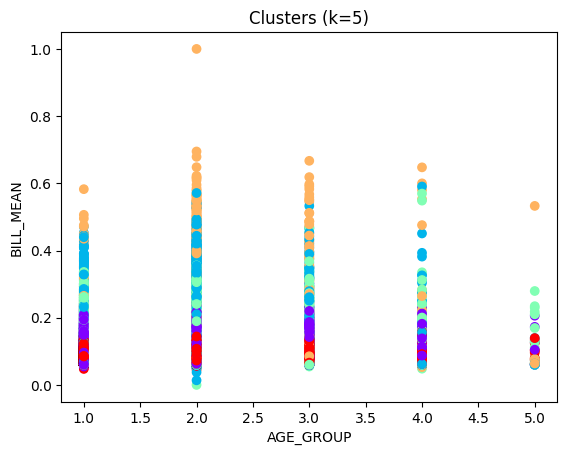

In [19]:
#Plota o gráfico de dispersão observando BILL_MEAN e AGE_GROUP para k=5
plt.scatter(df_X['AGE_GROUP'], df_X['BILL_MEAN'], c = y_kmeans5, cmap='rainbow')
plt.title('Clusters (k=5)')
plt.xlabel('AGE_GROUP')
plt.ylabel('BILL_MEAN')